In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Original Draft Data

master_data = pd.read_csv("../starting file/Draft_SD_CSV.csv")

C:\Users\daily\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Creating WAR Group Column

master_data.loc[(master_data["Total_WAR"] < 5), "WAR Group"] = "Less than 5 WAR"
master_data.loc[(master_data["Total_WAR"] < 10) & (master_data["Total_WAR"] >= 5), "WAR Group"] = "5-10 WAR"
master_data.loc[(master_data["Total_WAR"] < 15) & (master_data["Total_WAR"] >= 10), "WAR Group"] = "10-15 WAR"
master_data.loc[(master_data["Total_WAR"] < 20) & (master_data["Total_WAR"] >= 15), "WAR Group"] = "15-20 WAR"
master_data.loc[(master_data["Total_WAR"] < 25) & (master_data["Total_WAR"] >= 20), "WAR Group"] = "20-25 WAR"
master_data.loc[(master_data["Total_WAR"] >= 25), "WAR Group"] = "More than 25 WAR"
master_data["WAR Group"].fillna("No Major League Experience", inplace = True)

In [4]:
#Limiting the data to only Rockies players

rockies_data = master_data.loc[master_data["Franchise"] == "Rockies"]

#Only showing players that signed with the Rockies

signed_rockies_data = rockies_data.loc[rockies_data["Signed"] == "Y"]

#Grouped by draft class

draft_class_year = signed_rockies_data.groupby("Year")

#Unsigned Rockies draft picks

unsigned_rockies_data = rockies_data.loc[rockies_data["Signed"] == "N"]

In [5]:
#Total WAR by draft class sorted by best to worst

draft_class_year["Total_WAR"].sum().sort_values(ascending = False)

Year
1998    55.2
2009    34.9
1995    33.9
1997    30.7
2005    24.4
1993    23.9
2011    20.8
1999    19.5
2004    18.8
2008    18.5
2002    16.0
2000    15.5
2010    14.5
1996    13.9
2013    13.6
2012     8.3
2014     5.7
1992     4.8
2003     4.4
2006     4.2
2001     0.9
2018     0.0
2017     0.0
2019     0.0
2015    -0.1
2016    -0.3
1994    -1.2
2007    -5.1
Name: Total_WAR, dtype: float64

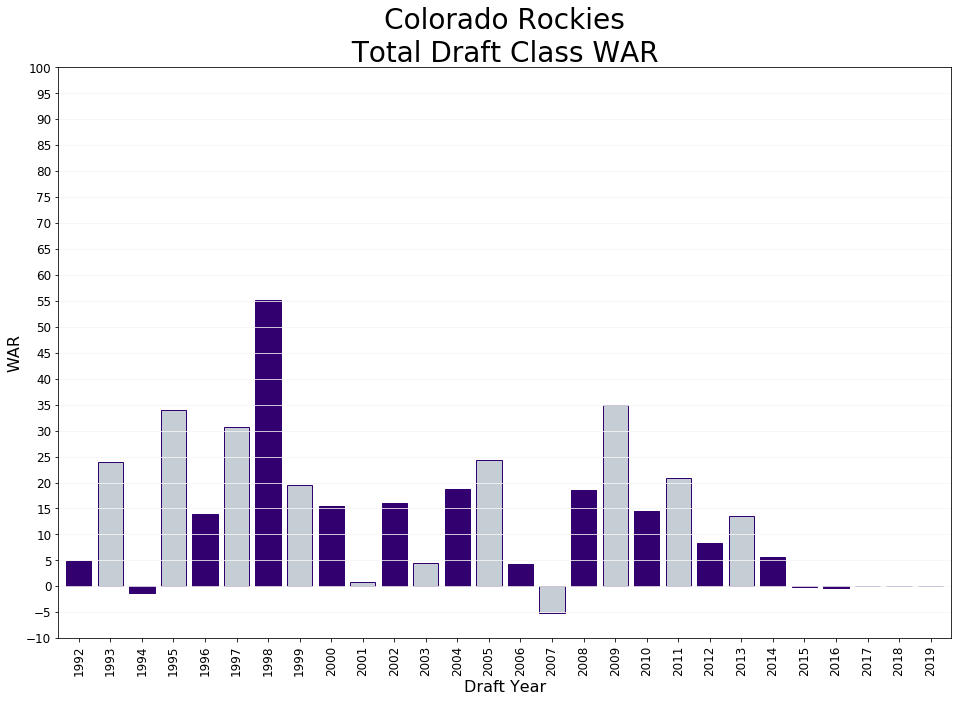

In [13]:
#WAR by draft class year bargraph

draft_class_year["Total_WAR"].sum().plot(kind = "bar", color = ["#33006F", "#C4CED4"], width = .8, fontsize = 12, edgecolor = "#33006F", figsize = (16, 10.5))
plt.title("Colorado Rockies\n Total Draft Class WAR ", size = 28)
plt.xlabel("Draft Year", size = 16)
plt.ylabel("WAR", size = 16)
plt.yticks(np.arange(-10, 101, step = 5))
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("Rockies WAR Total by Draft Year.png")
plt.show()

In [7]:
#Best draft picks in franchise history

signed_rockies_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
30376,1995,1,8,Rockies,Rockies,Y,Todd Helton,1997.0,heltoto01,432.0,33.2,0.0,33.2,1B,4Yr,University of Tennessee,Knoxville,TN,More than 25 WAR
35587,1998,7,210,Rockies,Rockies,Y,Matt Holliday,2004.0,hollima01,1873.0,31.7,0.0,31.7,3B,HS,Stillwater HS,Stillwater,OK,More than 25 WAR
51712,2009,2,59,Rockies,Rockies,Y,Nolan Arenado,2013.0,arenano01,9777.0,31.3,0.0,31.3,3B,HS,El Toro HS,Lake Forest,CA,More than 25 WAR
45700,2005,1,7,Rockies,Rockies,Y,Troy Tulowitzki,2006.0,tulowtr01,3531.0,22.6,0.0,22.6,SS,4Yr,California State University Long Beach,Long Beach,CA,20-25 WAR
35767,1998,13,390,Rockies,Rockies,Y,Juan Pierre,2000.0,pierrju01,443.0,16.4,0.0,16.4,OF,4Yr,University of South Alabama,Mobile,AL,15-20 WAR
50221,2008,2,72,Rockies,Rockies,Y,Charlie Blackmon,2011.0,blackch02,7859.0,16.2,0.0,16.2,OF,4Yr,Georgia Institute of Technology,Atlanta,GA,15-20 WAR
33902,1997,4,132,Rockies,Rockies,Y,Chone Figgins,2002.0,figgich01,1580.0,15.7,0.0,15.7,SS,HS,Brandon HS,Brandon,FL,15-20 WAR
54744,2011,1,45,Rockies,Rockies,Y,Trevor Story,2016.0,storytr01,12564.0,15.4,0.0,15.4,SS,HS,Irving HS,Irving,TX,15-20 WAR
36838,1999,1,16,Rockies,Rockies,Y,Jason Jennings,2001.0,jennija01,434.0,1.5,12.7,14.2,RHP,4Yr,Baylor University,Waco,TX,10-15 WAR
33840,1997,2,70,Rockies,Rockies,Y,Aaron Cook,2002.0,cookaa01,1571.0,0.0,13.9,13.9,RHP,HS,Hamilton HS,Hamilton,OH,10-15 WAR


In [8]:
#Biggest draft busts found by looking at first rounders who had less than 5 WAR or didn't make majors

signed_rockies_data.loc[((signed_rockies_data["WAR Group"] == "Less than 5 WAR") |
(signed_rockies_data["WAR Group"] == "No Major League Experience")) & 
(signed_rockies_data["Rnd"] == 1)]

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
25556,1992,1,27,Rockies,Rockies,Y,John Burke,1996.0,burkejo04,1001686.0,-0.1,-0.2,-0.3,RHP,4Yr,University of Florida,Gainesville,FL,Less than 5 WAR
28669,1994,1,7,Rockies,Rockies,Y,Doug Million,NaN,NaN,NaN,NaN,NaN,NaN,LHP,HS,Sarasota HS,Sarasota,FL,No Major League Experience
33788,1997,1,18,Rockies,Rockies,Y,Mark Mangum,NaN,NaN,NaN,NaN,NaN,NaN,RHP,HS,Kingwood HS,Kingwood,TX,No Major League Experience
35405,1998,1,28,Rockies,Rockies,Y,Matt Roney,2003.0,roneyma01,1670.0,0.0,-0.5,-0.5,RHP,HS,Edmond North HS,Edmond,OK,Less than 5 WAR
35413,1998,1,36,Rockies,Rockies,Y,Choo Freeman,2004.0,freemch01,1872.0,-1.4,0.0,-1.4,OF,HS,Dallas Christian HS,Mesquite,TX,Less than 5 WAR
35417,1998,1,40,Rockies,Rockies,Y,Jeff Winchester,NaN,NaN,NaN,NaN,NaN,NaN,C,HS,Archbishop Rummel HS,Metairie,LA,No Major League Experience
39792,2001,1,44,Rockies,Rockies,Y,Jayson Nix,2008.0,nixja01,3790.0,1.4,0.0,1.4,SS,HS,Midland HS,Midland,TX,Less than 5 WAR
42725,2003,1,10,Rockies,Rockies,Y,Ian Stewart,2007.0,stewaia01,5950.0,2.2,0.0,2.2,3B,HS,La Quinta HS,Westminster,CA,Less than 5 WAR
44204,2004,1,9,Rockies,Rockies,Y,Chris Nelson,2010.0,nelsoch01,8175.0,-1.9,0.0,-1.9,SS,HS,Redan HS,Stone Mountain,GA,Less than 5 WAR
45725,2005,1,32,Rockies,Rockies,Y,Chaz Roe,2013.0,roech01,9866.0,0.0,1.8,1.8,RHP,HS,Lafayette HS,Lexington,KY,Less than 5 WAR


In [9]:
#Best unsigned draft picks in franchise history

unsigned_rockies_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
49338,2007,21,642,Rockies,Rockies,N,Chris Sale,2010.0,salech01,10603.0,-0.1,27.1,27.0,LHP,HS,Lakeland Senior HS,Lakeland,FL,More than 25 WAR
45295,2004,37,1100,Rockies,Rockies,N,Todd Frazier,2011.0,frazito01,785.0,20.9,0.0,20.9,OF,HS,Toms River South HS,Toms River,NJ,20-25 WAR
42424,2002,40,1191,Rockies,Rockies,N,Matt Garza,2006.0,garzama01,3340.0,-0.8,15.5,14.7,RHP,HS,Washington Union HS,Fresno,CA,10-15 WAR
52524,2009,29,871,Rockies,Rockies,N,Corey Dickerson,2013.0,dickeco01,10762.0,11.5,0.0,11.5,OF,JC,Meridian Community College,Meridian,MS,10-15 WAR
36637,1998,42,1260,Rockies,Rockies,N,Nyjer Morgan,2007.0,morgany01,4885.0,10.7,0.0,10.7,OF,HS,Rogers Secondary School,Nelson,BC,10-15 WAR
54065,2010,29,890,Rockies,Rockies,N,Marco Gonzales,2014.0,gonzama02,15467.0,0.3,7.0,7.3,LHP,HS,Rocky Mountain HS,Fort Collins,CO,5-10 WAR
47722,2006,18,528,Rockies,Rockies,N,Andrew Cashner,2010.0,cashnan01,8782.0,0.2,6.6,6.8,RHP,JC,Angelina College,Lufkin,TX,5-10 WAR
41283,2002,2,50,Rockies,Rockies,N,Micah Owings,2007.0,owingmi01,4253.0,3.1,2.3,5.4,RHP,HS,Gainesville HS,Gainesville,GA,5-10 WAR
54987,2011,9,288,Rockies,Rockies,N,Ross Stripling,2016.0,stripro01,13273.0,-0.2,5.4,5.2,RHP,4Yr,Texas A&M University,College Station,TX,5-10 WAR
34862,1997,36,1092,Rockies,Rockies,N,Alfredo Amezaga,2002.0,amezaal01,1.0,4.0,0.0,4.0,SS,HS,Miami Senior HS,Miami,FL,Less than 5 WAR


In [10]:
#Best Draft Picks outside the top 10 rounds

hidden_gems = signed_rockies_data.loc[signed_rockies_data["Rnd"] > 10].sort_values("Total_WAR", ascending = False)

hidden_gems.head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
35767,1998,13,390,Rockies,Rockies,Y,Juan Pierre,2000.0,pierrju01,443.0,16.4,0.0,16.4,OF,4Yr,University of South Alabama,Mobile,AL,15-20 WAR
44605,2004,14,410,Rockies,Rockies,Y,Dexter Fowler,2008.0,fowlede01,4062.0,10.5,0.0,10.5,OF,HS,Milton HS,Milton,GA,10-15 WAR
25848,1992,11,319,Rockies,Rockies,Y,Craig Counsell,1995.0,counscr01,52.0,6.0,0.0,6.0,SS,4Yr,University of Notre Dame,South Bend,IN,5-10 WAR
38613,2000,11,317,Rockies,Rockies,Y,Brad Hawpe,2004.0,hawpebr01,1885.0,3.7,0.0,3.7,1B,4Yr,Louisiana State University,Baton Rouge,LA,Less than 5 WAR
56697,2012,15,468,Rockies,Rockies,Y,Scott Oberg,2015.0,obergsc01,13911.0,0.0,2.4,2.4,RHP,4Yr,University of Connecticut,Storrs,CT,Less than 5 WAR
43602,2003,30,887,Rockies,Rockies,Y,Eric Young Jr.,2009.0,younger03,7158.0,2.2,0.0,2.2,2B,HS,Piscataway HS,Piscataway,NJ,Less than 5 WAR
38643,2000,12,347,Rockies,Rockies,Y,Sean Green,2006.0,greense01,3001.0,0.0,1.3,1.3,RHP,4Yr,University of Louisville,Louisville,KY,Less than 5 WAR
41554,2002,11,321,Rockies,Rockies,Y,Ryan Shealy,2005.0,shealry01,4443.0,1.3,0.0,1.3,1B,4Yr,University of Florida,Gainesville,FL,Less than 5 WAR
55317,2011,20,618,Rockies,Rockies,Y,Dan Winkler,2015.0,winklda01,12237.0,0.0,1.2,1.2,RHP,4Yr,University of Central Florida,Orlando,FL,Less than 5 WAR
37672,1999,28,850,Rockies,Rockies,Y,Justin Hampson,2006.0,hampsju01,2209.0,-0.1,1.1,1.0,LHP,JC,Southwestern Illinois College,Belleville,IL,Less than 5 WAR


In [11]:
#Creating table for percentage of picks by school type

draft_year_school_table_pct = pd.crosstab(rockies_data["Year"], rockies_data["Type"], normalize = "index")

100 * round(draft_year_school_table_pct,3)

Type,4Yr,HS,JC
Year,,,
1992,56.0,18.0,26.0
1993,38.3,38.3,23.3
1994,33.9,44.6,21.4
1995,36.2,44.8,19.0
1996,29.4,45.1,25.5
1997,23.4,48.9,27.7
1998,39.6,43.8,16.7
1999,32.7,44.9,22.4
2000,46.0,30.0,24.0


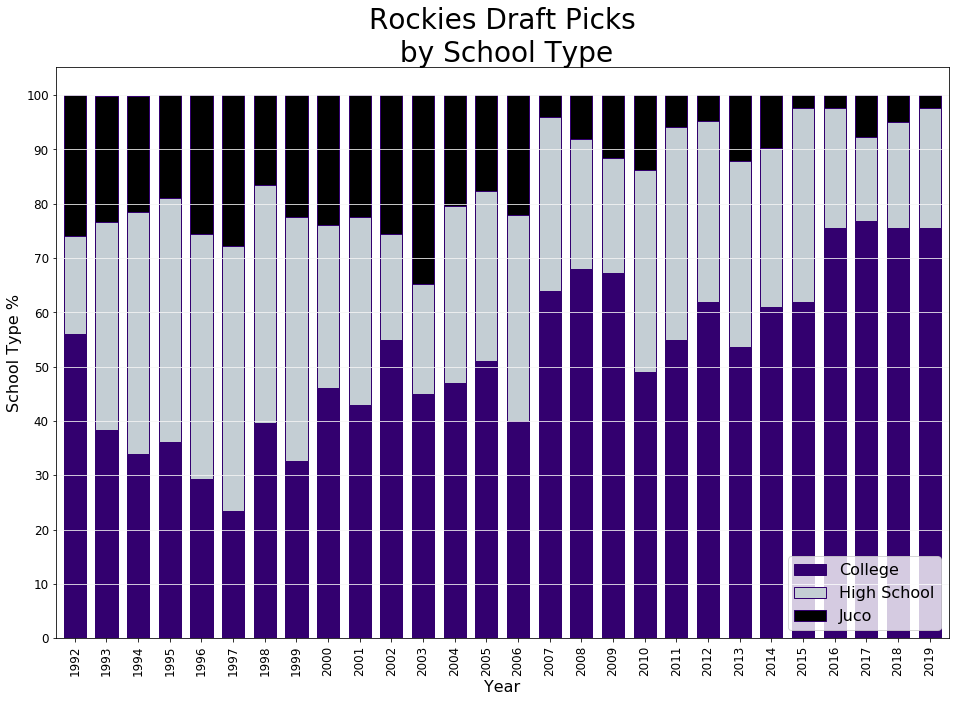

In [12]:
#Bar chart of table above

colors = ["#33006F", "#C4CED4", "#000000"]

(100 * round(draft_year_school_table_pct,3)).plot(kind = "bar", color = colors, width = .7, fontsize = 12, 
edgecolor = "#33006F", stacked = True, figsize = (16, 10.5))
plt.title("Rockies Draft Picks\n by School Type", size = 28)
plt.xlabel("Year", size = 16)
plt.ylabel("School Type %", size = 16)
plt.yticks(np.arange(0, 101, step = 10))
plt.legend(["College", "High School", "Juco"], loc = "lower right", fontsize = 16)
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("Rockies Draft Picks by School Type.png")
plt.show()